In [1]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import sys
import matplotlib
%matplotlib inline

In [2]:
names = ['name1','name2','name3','name4','name5']
birth = [968,155,156,126,456]

In [3]:
babe = list(zip(names,birth))
babe

[('name1', 968),
 ('name2', 155),
 ('name3', 156),
 ('name4', 126),
 ('name5', 456)]

In [4]:
df = pd.DataFrame(data=babe,columns=['Names','Birth'])
df

,Names,Birth
0,name1,968
1,name2,155
2,name3,156
3,name4,126
4,name5,456


In [5]:
df.describe()

,Birth
count,5.000000
mean,372.200000
std,359.351082
min,126.000000
25%,155.000000
50%,156.000000
75%,456.000000
max,968.000000


In [6]:
df['Names'].max()

'name5'

In [7]:
df['Birth'].max()

968

In [8]:
sorted_df = df.sort_values(['Birth'], ascending=False)
sorted_df.head(1)

,Names,Birth
0,name1,968


Text(20, 10, "['968-name1']")

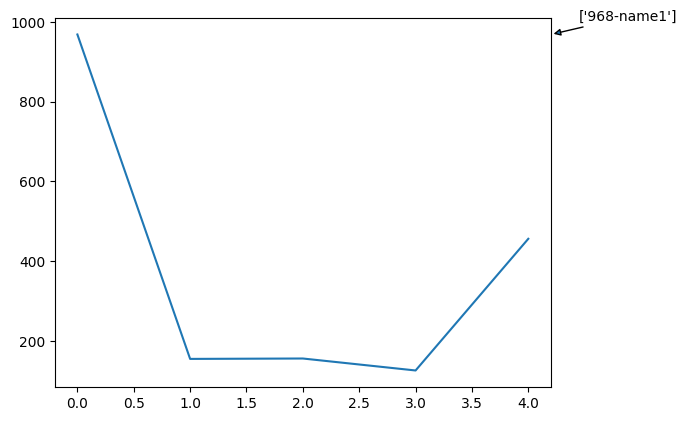

In [19]:
df['Birth'].plot()

max_value = df['Birth'].max()
filter = df['Birth'] == max_value
max_name = df['Names'][filter].values

text = str(max_value) + '-' + max_name
plt.annotate(text, xy=(1,max_value),xytext=(20,10), textcoords='offset points', xycoords=('axes fraction', 'data'), arrowprops={'arrowstyle': '-|>'})

In [20]:
df

,Names,Birth
0,name1,968
1,name2,155
2,name3,156
3,name4,126
4,name5,456


In [22]:
from numpy import random

In [28]:
random.randint(1,100,10)

array([ 7, 44, 23, 38, 80, 45, 52,  1, 18, 98])

In [48]:
names = ['Bob','Dilan','Eva','Alex','Vika']
random.seed(341)
random_name = [names[random.randint(0,len(names))] for i in range(1000)]
random_name[:10]
birth2 = [random.randint(0,1000) for i in range(1000)]
birth2[:10]
baby = list(zip(random_name,birth2))
baby[0:10]

[('Alex', 470),
 ('Alex', 175),
 ('Eva', 153),
 ('Eva', 980),
 ('Vika', 20),
 ('Vika', 411),
 ('Bob', 335),
 ('Vika', 673),
 ('Alex', 915),
 ('Bob', 257)]

In [51]:
df = pd.DataFrame(data=baby, columns=['Names','Births'])
df[:10]

,Names,Births
0,Alex,470
1,Alex,175
2,Eva,153
3,Eva,980
4,Vika,20
5,Vika,411
6,Bob,335
7,Vika,673
8,Alex,915
9,Bob,257


In [52]:
df.to_csv('births1000.csv', index=False, header=False)

In [54]:
df = pd.read_csv('births1000.csv', names=['Names','Births'])
df.head(20)

,Names,Births
0,Alex,470
1,Alex,175
2,Eva,153
3,Eva,980
4,Vika,20
5,Vika,411
6,Bob,335
7,Vika,673
8,Alex,915
9,Bob,257


In [55]:
df.tail(10)

,Names,Births
990,Eva,873
991,Eva,508
992,Bob,0
993,Bob,844
994,Vika,139
995,Bob,861
996,Vika,359
997,Eva,105
998,Bob,256
999,Dilan,228


In [59]:
df['Names'].unique()

array(['Alex', 'Eva', 'Vika', 'Bob', 'Dilan'], dtype=object)

In [60]:
df['Names'].unique().size

5

In [61]:
df['Names'].describe()

count     1000
unique       5
top        Bob
freq       218
Name: Names, dtype: object

In [77]:
name = df.groupby('Names')
name.head()

,Names,Births
0,Alex,470
1,Alex,175
2,Eva,153
3,Eva,980
4,Vika,20
5,Vika,411
6,Bob,335
7,Vika,673
8,Alex,915
9,Bob,257


In [79]:
df = name.sum()
df.head(10)

,Births
Names,
Alex,96573
Bob,106217
Dilan,90380
Eva,102325
Vika,106163


In [82]:
sort = df.sort_values(['Births'],ascending=False)
sort.head(1)

,Births
Names,
Bob,106217


<Axes: xlabel='Names'>

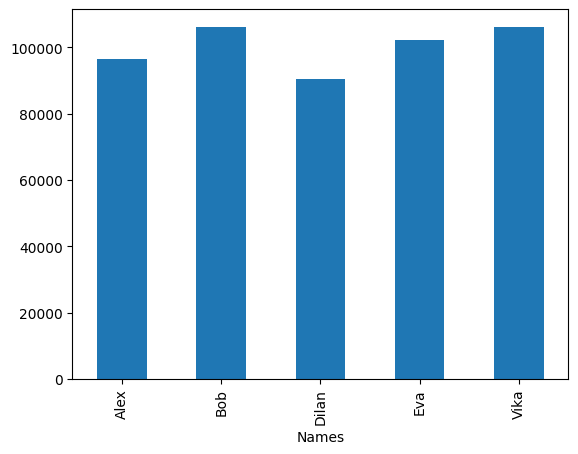

In [87]:
df['Births'].plot.bar()

Новый датасет
Сгенерировать данные случайным образом

```text
date_in       |  customer_count  | country_code  | status
2024-01-01    |   901            | RU            | 1
2024-01-02    |   901            | US            | 2
2024-01-03    |   901            | KZ            | 3
2024-01-04    |   901            | IT            | 1
2024-01-05    |   901            | RU            | 4
2024-01-06    |   901            | RU            | 1
2024-01-01    |   901            | RU            | 1
2024-01-02    |   901            | US            | 2
2024-01-03    |   1023           | US            | 3
2024-01-04    |   901            | IT            | 1
2024-01-05    |   901            | RU            | 4
2024-01-06    |   901            | RU            | 1
```
для примера датасет для диапазона 2024-01-01 - 2024-02-28 x 4

In [107]:
def create_dataset(number):
    result=[]
    country_codes = ['RU','Ru','US','us','KZ','IT','it','CA','Ca']
    status = [1,2,3]
    for i in range(number):
        dates_rng = pd.date_range(start='2024-01-01', end='2024-02-28', freq='D')
        rand_customer_count = random.randint(0,1000,len(dates_rng))
        rand_status = [status[random.randint(0,len(status))] for i in range(0,len(dates_rng))]
        rand_country_code = [country_codes[random.randint(0,len(country_codes))] for i in range(0,len(dates_rng))]
        result.extend(zip(dates_rng,rand_customer_count,rand_country_code,rand_status))
    return result

In [108]:
dataset = create_dataset(number=4)
df = pd.DataFrame(data=dataset, columns=['date_in','customer_count','country_code','status'])
df

,date_in,customer_count,country_code,status
0,2024-01-01,978,KZ,1
1,2024-01-02,709,RU,1
2,2024-01-03,296,US,1
3,2024-01-04,918,US,3
4,2024-01-05,743,RU,1
...,...,...,...,...
231,2024-02-24,841,CA,2
232,2024-02-25,51,it,1
233,2024-02-26,331,US,2
234,2024-02-27,639,it,3


In [109]:
df.to_excel('company_stats.xlsx',index=False)

In [165]:
df = pd.read_excel('company_stats.xlsx',0, index_col='date_in')
df.head()

,customer_count,country_code,status
date_in,,,
2024-01-01,978,KZ,1
2024-01-02,709,RU,1
2024-01-03,296,US,1
2024-01-04,918,US,3
2024-01-05,743,RU,1


In [136]:
df.index

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-24', '2024-02-25', '2024-02-26',
               '2024-02-27', '2024-02-28'],
              dtype='datetime64[ns]', name='date_in', length=236, freq=None)

In [137]:
df.dtypes

customer_count     int64
country_code      object
status             int64
dtype: object

In [138]:
df['country_code'] = [i.upper() for i in df['country_code']] # 1 способ

In [139]:
df

,customer_count,country_code,status
date_in,,,
2024-01-01,978,KZ,1
2024-01-02,709,RU,1
2024-01-03,296,US,1
2024-01-04,918,US,3
2024-01-05,743,RU,1
...,...,...,...
2024-02-24,841,CA,2
2024-02-25,51,IT,1
2024-02-26,331,US,2


In [166]:
df['country_code'] = df.country_code.apply(lambda x: x.upper()) # 2 способ

In [167]:
df

,customer_count,country_code,status
date_in,,,
2024-01-01,978,KZ,1
2024-01-02,709,RU,1
2024-01-03,296,US,1
2024-01-04,918,US,3
2024-01-05,743,RU,1
...,...,...,...
2024-02-24,841,CA,2
2024-02-25,51,IT,1
2024-02-26,331,US,2


In [169]:
filter_status = df['status']==1
df = df[filter_status]
#df2 = df[df['status'] == 1] # 2 способ
df

,customer_count,country_code,status
date_in,,,
2024-01-01,978,KZ,1
2024-01-02,709,RU,1
2024-01-03,296,US,1
2024-01-05,743,RU,1
2024-01-15,179,CA,1
...,...,...,...
2024-02-19,689,RU,1
2024-02-22,890,RU,1
2024-02-23,96,IT,1


In [170]:
filter_country = df['country_code']=='RU'
df = df[filter_country]
df

,customer_count,country_code,status
date_in,,,
2024-01-02,709,RU,1
2024-01-05,743,RU,1
2024-01-17,216,RU,1
2024-01-18,685,RU,1
2024-01-24,354,RU,1
2024-01-25,594,RU,1
2024-02-13,950,RU,1
2024-02-22,211,RU,1
2024-01-08,405,RU,1
